In [1]:
import numpy as np
import pandas as pd 

In [2]:
df_can=pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                    sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2)
print('Data read')

Data read


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [6]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
    df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
    df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
#test if columns are String
all(isinstance(column,str) for column in df_can.columns)

True

In [13]:
#convert columns to String
df_can.columns=list(map(str,df_can.columns))

#check again
all(isinstance(column,str) for column in df_can.columns)

True

In [14]:
df_can.set_index('Country',inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [15]:
#adding a 'Total' column
df_can['Total']=df_can.sum(axis=1)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
print('data dimensions:',df_can.shape )

data dimensions: (195, 38)


In [17]:
#list of years
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('ggplot')
print(mpl.__version__)

3.0.3


In [24]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


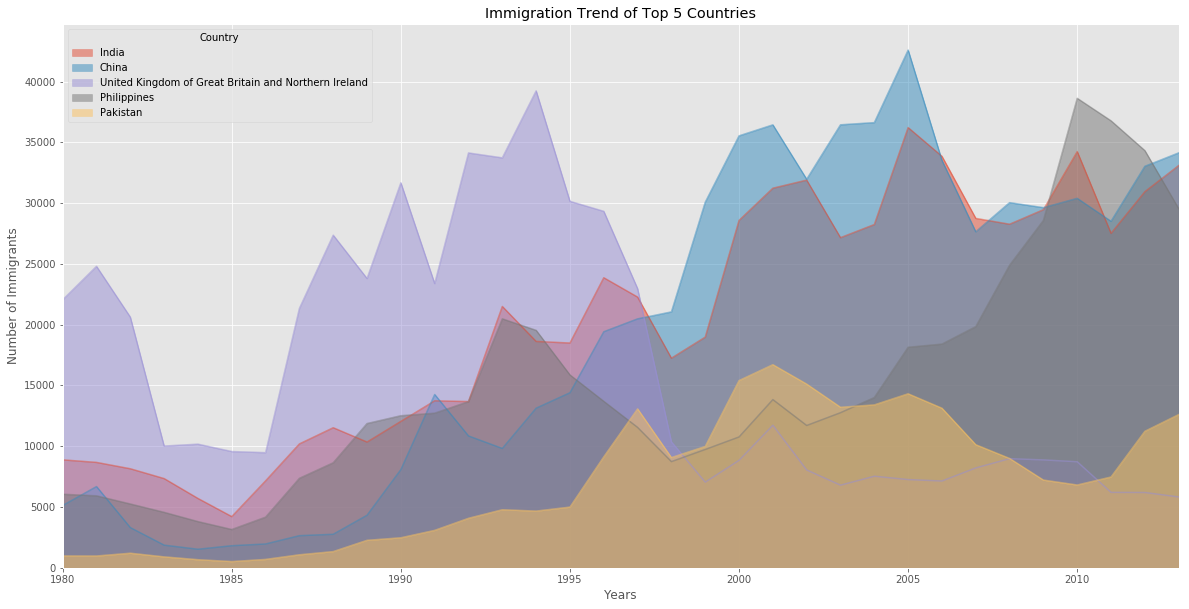

In [25]:
#changing the index to int 
df_top5.index = df_top5.index.map(int) 

df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

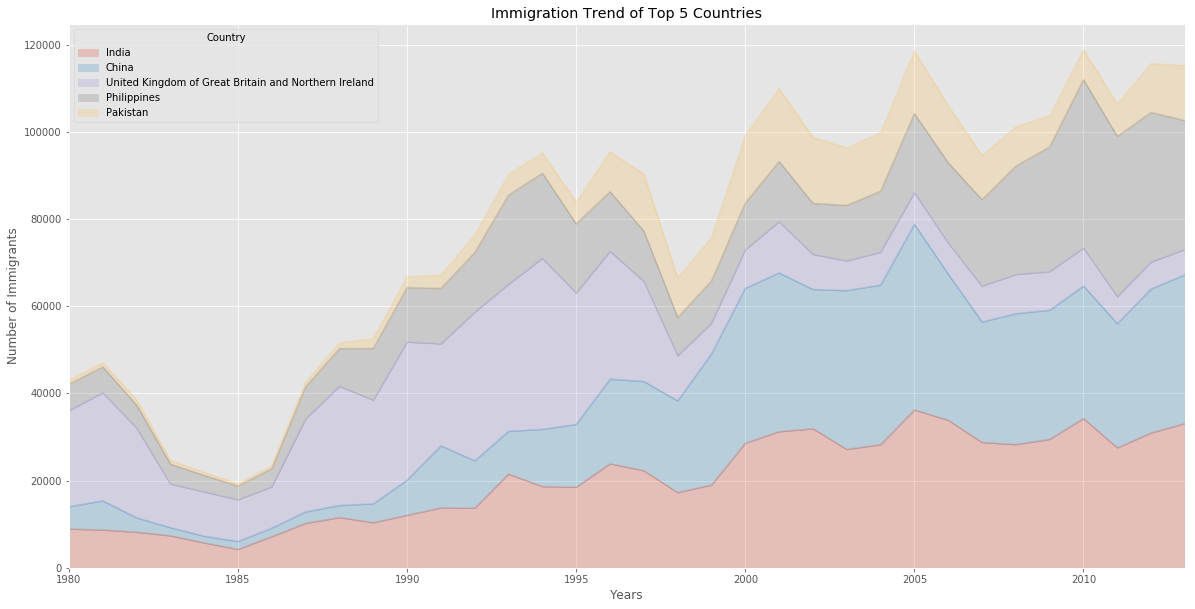

In [27]:
df_top5.plot(kind='area',
            alpha=.25, #changing transparency value
             stacked=True,
             figsize=(20,10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

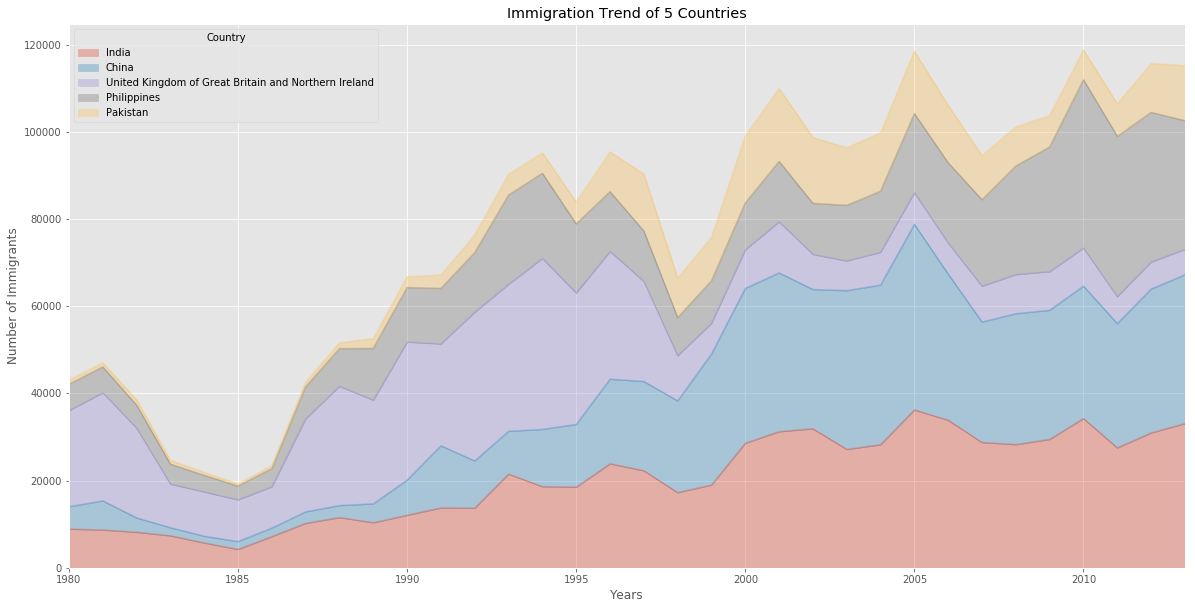

In [28]:
#more flexible option for plotting 
ax=df_top5.plot(kind='area',alpha=.35,figsize=(20,10))

ax.set_title('Immigration Trend of 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


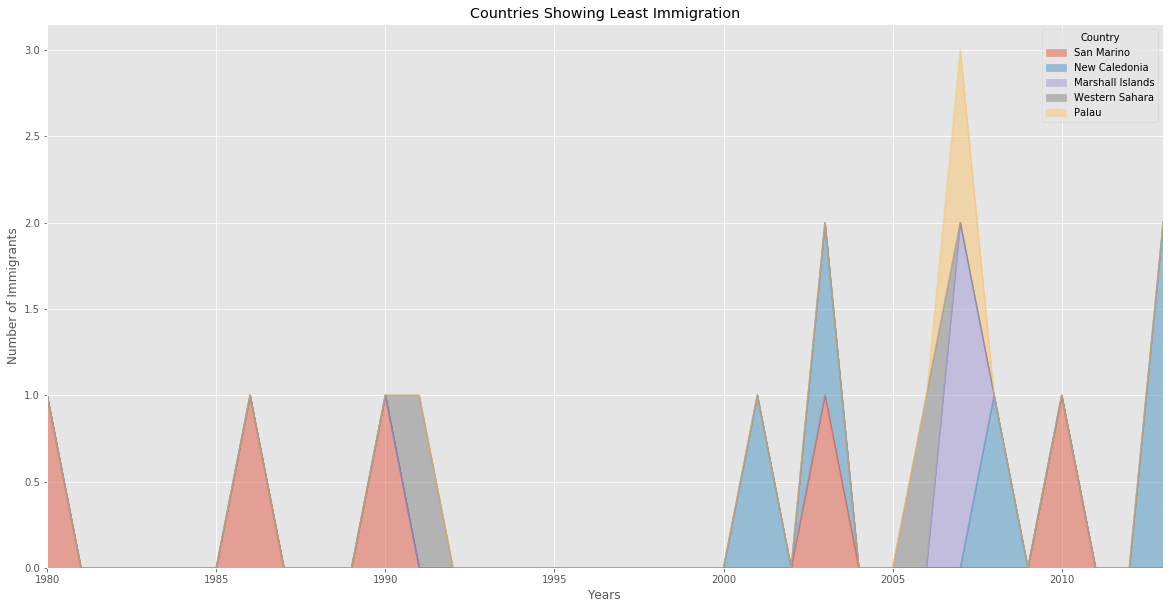

In [45]:
#plotting trends 5 countries that contributed the least to immigration into Canada from 1980-2013  

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the least 5 entries
df_least5 = df_can.tail()
df_least5

# transpose the dataframe
df_least5 = df_least5[years].transpose() 

df_least5.index.map(int)

df_least5.plot(kind='area',
              alpha=.45,
              stacked=True,
              figsize=(20,10),
              )
plt.title('Countries Showing Least Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

Text(0.5, 0, 'Years -->')

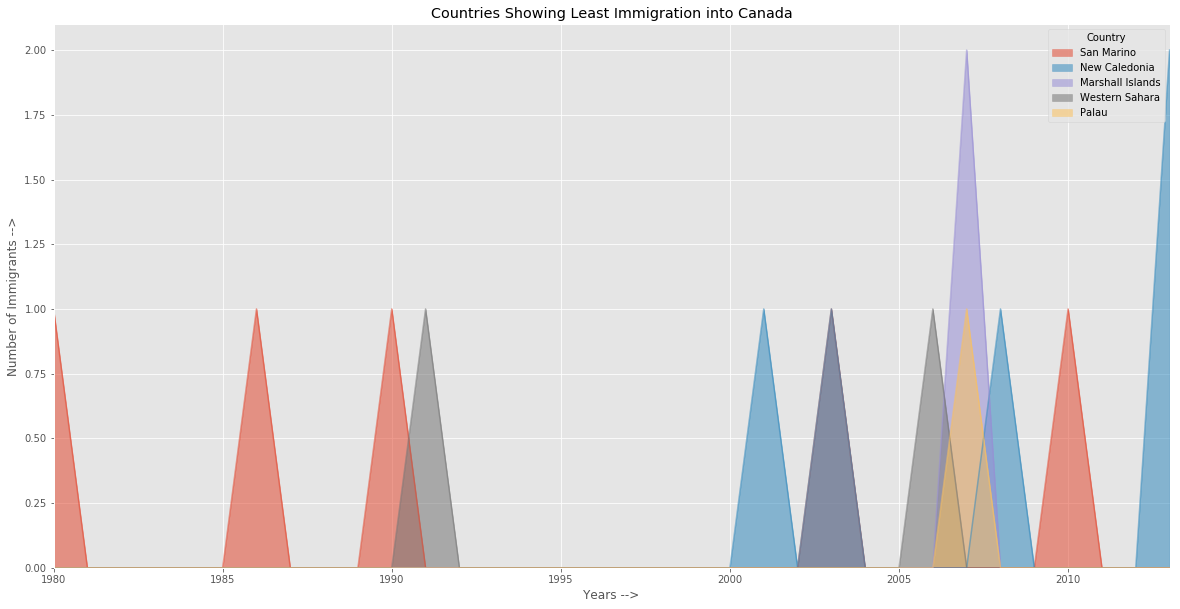

In [49]:
ax=df_least5.plot(kind='area',stacked=False,alpha=.55,figsize=(20,10))

ax.set_title('Countries Showing Least Immigration into Canada')
ax.set_ylabel('Number of Immigrants -->')
ax.set_xlabel('Years -->')

In [50]:
#HISTOGRAM
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [52]:
count, bin_edges=np.histogram(df_can['2013']) #np.histogram returns 2 values
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


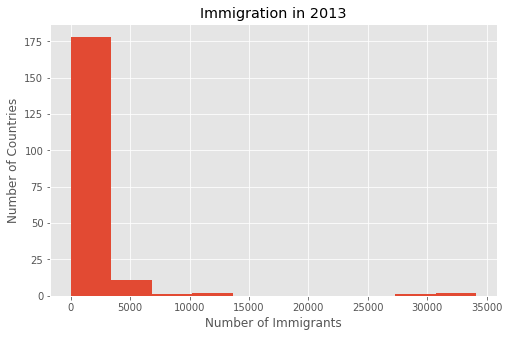

In [55]:
df_can['2013'].plot(kind='hist',figsize=(8,5) )
plt.title('Immigration in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

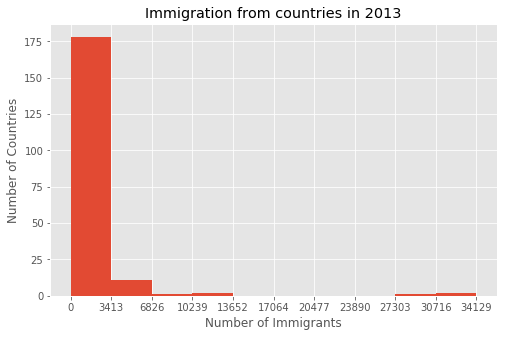

In [57]:
count, bin_edges=np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist',figsize=(8,5),xticks=bin_edges)

plt.title('Immigration from countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

In [58]:
#Plotting Frequency dist for 3 coutries 
df_can.loc[['Denmark','Norway','Sweden'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


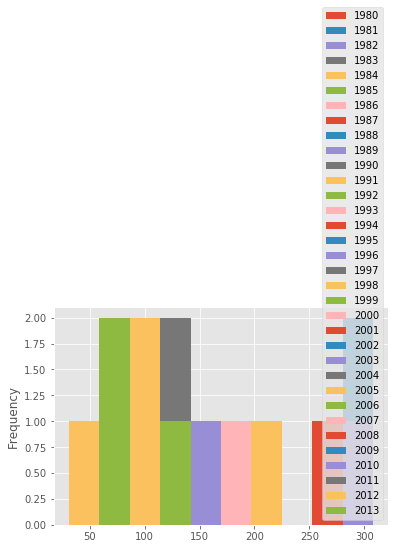

In [59]:
df_can.loc[['Denmark','Norway','Sweden'],years].plot.hist()

In [60]:
#pandas plotted years in the above histogram instead of plotting countries, needs to be fixed with a transpose 
df_t=df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


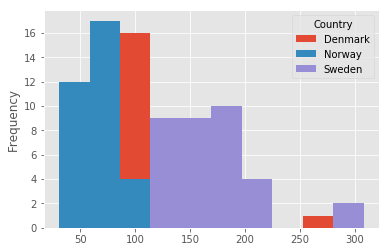

In [61]:
df_t.plot.hist()

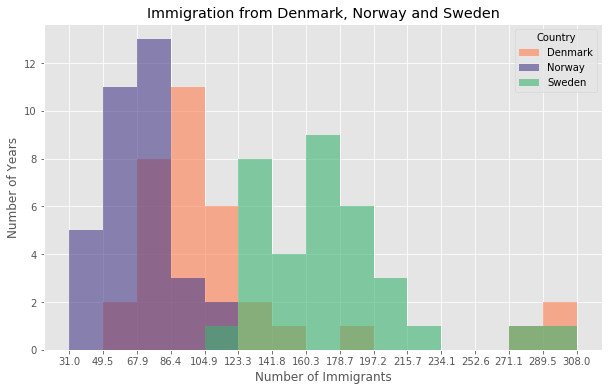

In [65]:
#aesthetics
count, bin_edges=np.histogram(df_t,15) #bin size 15
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Immigration from Denmark, Norway and Sweden')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

In [66]:
#full list of colours
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


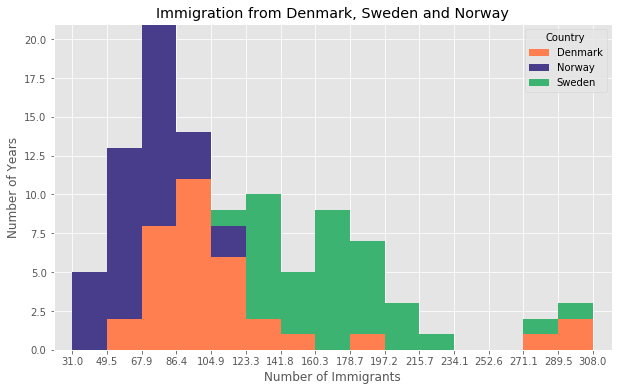

In [67]:
count, bin_edges=np.histogram(df_t,15)
xmin=bin_edges[0]-[10] #buffer of 10 for aesthetics
xmax=bin_edges[-1]+[10] #buffer of 10

#stacking to avoid overlapping
df_t.plot(kind='hist',figsize=(10,6),bins=15,xticks=bin_edges,
         color=('coral','darkslateblue','mediumseagreen'),
         stacked=True,xlim=(xmin,xmax))

plt.title('Immigration from Denmark, Sweden and Norway')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

In [70]:
df_new=df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()
df_new

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11
1985,584,0,24
1986,547,1,33
1987,765,2,52
1988,564,2,43
1989,773,3,85


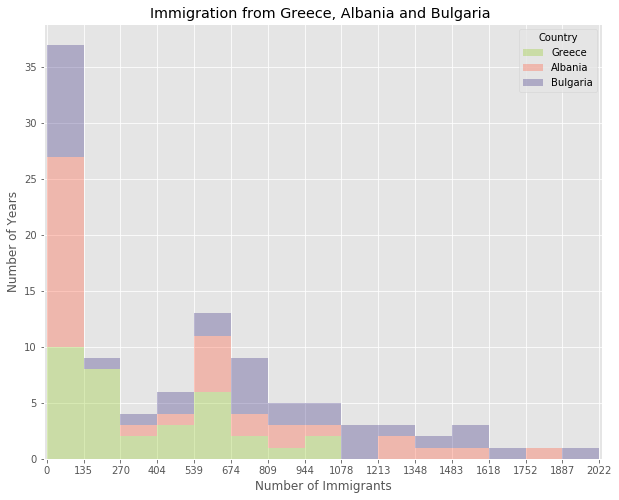

In [79]:
count, bin_edges=np.histogram(df_new,15)
xmin=bin_edges[0]-[10]
xmax=bin_edges[-1]+[10]

df_new.plot(kind='hist', alpha=.35,
           figsize=(10,8), bins=15, xticks=bin_edges,
           color=('yellowgreen','tomato','darkslateblue'),
           stacked=True,xlim=(xmin,xmax))

plt.title('Immigration from Greece, Albania and Bulgaria ')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

In [80]:
#BAR GRAPH
#considering iceland's immigration
df_iceland=df_can.loc[['Iceland'],years]
df_iceland.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Iceland,17,33,10,9,13,6,11,11,7,3,...,23,10,2,15,13,15,30,38,42,72


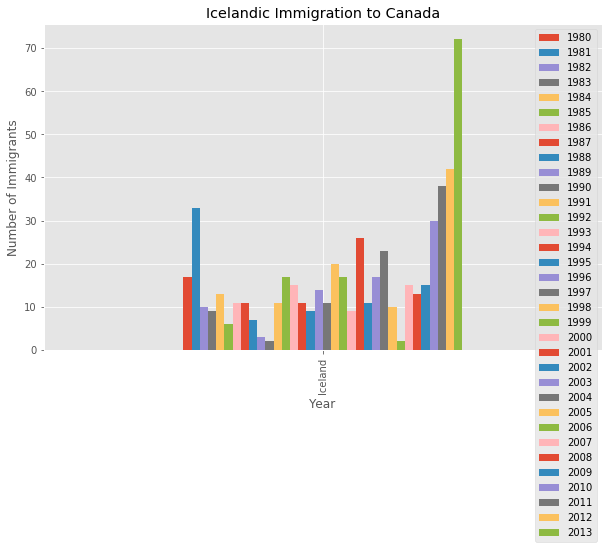

In [81]:
df_iceland.plot(kind='bar', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigration to Canada')
plt.show()

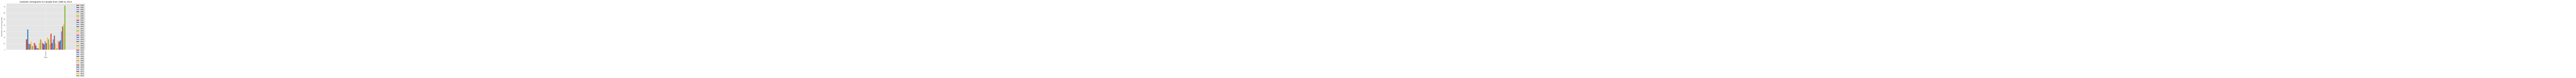

In [88]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='darkslateblue', lw=2)
            )

plt.show()

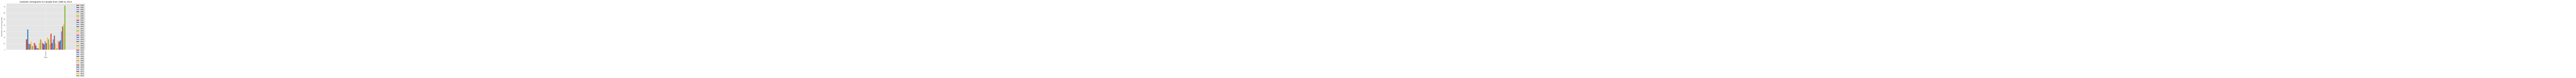

In [91]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [100]:
#Top 15 Countries
df_can.sort_values(by='Total',ascending=False,inplace=True)
df_top15=df_can['Total'].head(15)
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

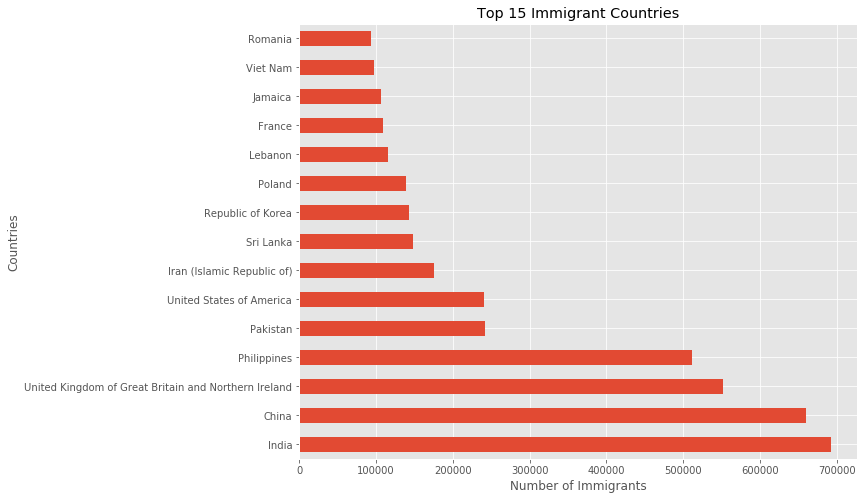

In [101]:
df_top15.plot(kind='barh',figsize=(10,8))
plt.title('Top 15 Immigrant Countries')
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')
plt.show()